In [1]:
# Умножение входных данных на 3
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd

tf.random.set_seed(0)

In [2]:
#model.summary()
#создание обучающих данных
X = np.array([[1],[3],[2],[10],[4],[7],[8]])
y = np.array([[3,9,6,30,12,21,24]]).T

In [15]:
model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])



model.compile(optimizer='sgd', loss='mse', metrics='mae')
model.fit(X, y, epochs=100)

inp1, inp2 = 5, -9
print(f'Проверка новых данных: {inp1}, {inp2}')
print(f'Предсказание нейронной сети:')
result = model.predict(np.array([[inp1],[inp2]]))
print(result)

print(pd.DataFrame({
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X))
}))

In [16]:
w1, w0 = model.get_weights()
w1 = w1[0][0]
w0 = w0[0]

w1, w0

(0.8126925, 0.0)

In [21]:
model.predict(X[:1])

1/1 [==============================] - 0s 263ms/step


array([[0.8126925]], dtype=float32)

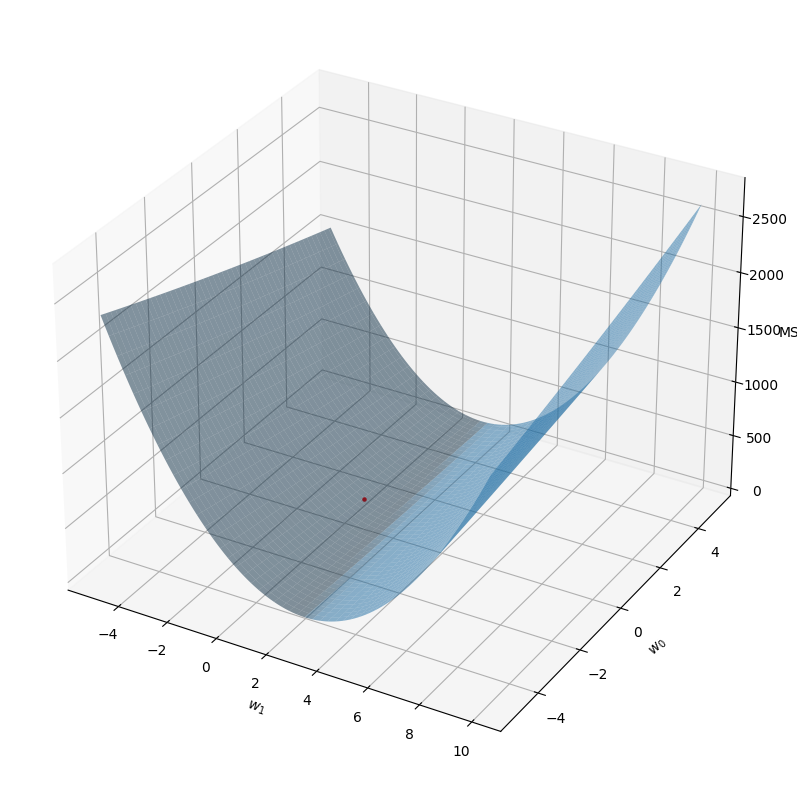

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

def mse(w1, w0):
    y_pred = w1 * X[:,0] + w0
    return np.mean((y-y_pred)**2)

coefs_w1 = np.linspace(-5, 10, num=100)
coefs_w0 = np.linspace(-5, 5, num=100)
w1s, w0s = np.meshgrid(coefs_w1, coefs_w0)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([mse(i,j) for i, j in zip(np.ravel(w1s), np.ravel(w0s))])
Z = zs.reshape(w1s.shape)

ax.plot_surface(w1s, w0s, Z, alpha=.5)
ax.scatter(w1, w0, mse(w1, w0), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('MSE')

plt.show()

In [47]:
#функция определяет среднеквадратичную ошибку
def mserror(X, w1, w0, y):
    y_pred = w1 *X[:,0] + w0
    return np.sum((y-y_pred)**2)/len(y_pred)

#функция градиента
def qr_mserror(X, w1, w0, y):
    y_pred = w1*X+w0
    return {'grad_w1': 2/len(y)*np.sum((y-y_pred)*(-X)),
            'grad_w0': 2/len(y)*np.sum((y-y_pred))*(-1)}

In [48]:
preds = X * w1 + w0
preds

array([[0.81269252],
       [2.43807757],
       [1.62538505],
       [8.12692523],
       [3.25077009],
       [5.68884766],
       [6.50154018]])

In [49]:
df = pd.DataFrame({
    'true': np.squeeze(y),
    'pred': np.squeeze(preds)
})

df

,true,pred
0,3,0.812693
1,9,2.438078
2,6,1.625385
3,30,8.126925
4,12,3.250770
5,21,5.688848
6,24,6.501540


In [50]:
np.mean((df['true'] - df['pred'])**2)

166.0840431056651

In [51]:
weigth_1 = [w1]
weigth_0 = [w0]

In [52]:
grad = qr_mserror(X, w1, w0, y)
grad

{'grad_w1': -151.86163340296062, 'grad_w0': -21.873074769973755}

In [53]:
next_w_1 = w1 - grad['grad_w1']
next_w_0 = w0 - grad['grad_w0']

next_w_1, next_w_0

(152.67432592596325, 21.873074769973755)

In [54]:
preds = X * next_w_1 + next_w_0

df = pd.DataFrame({
    'true': np.squeeze(y),
    'pred': np.squeeze(preds)
})

df

,true,pred
0,3,174.547401
1,9,479.896053
2,6,327.221727
3,30,1548.616334
4,12,632.570378
5,21,1090.593356
6,24,1243.267682


In [56]:
grad = qr_mserror(X, w1, w0, y)
grad

{'grad_w1': -151.86163340296062, 'grad_w0': -21.873074769973755}

In [ ]:
lr = 0.01
next_w_1 = w1 - lr * grad['grad_w1']
next_w_0 = w0 - lr * grad['grad_w0']

weigth_1.append(next_w_1)
weigth_0.append(next_w_0)

next_w_1, next_w_0